# Data Cleaning Project

Sustainable Development Goal 15.4 aims, by 2030, to "ensure the conservation of mountain ecosystems, including their biodiversity, in order to enhance their capacity to provide benefits that are essential for sustainable development". 

This is achieved by monitoring the following two indicators:
1. Coverage by protected areas of important sites for mountain biodiversity
2. Mountain Green Cover Index: percentage of green cover over the total surface of a region

The data sets were obtained from selecting the relevant checkboxes on [this website](https://unstats.un.org/sdgs/indicators/database/).

----
relevant information surrounding how these are measured.


The reason why this SDG was chosen for this data project was because the data:
1. have many unknown, missing values that are attached to countries over time -- countries may have only or partial missing values
2. seem to have a few columns that aren't informative 


In [406]:
# libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data read-in
SDG_15_4_1 = pd.ExcelFile("SDG_15_4_1.xlsx")
SDG_15_4_2 = pd.ExcelFile("SDG_15_4_2.xlsx")

# data read-in -- description
SDG_15_4_1_desc = pd.read_excel("SDG_15_4_1.xlsx", sheet_name = 0)
SDG_15_4_2_desc = pd.read_excel("SDG_15_4_2.xlsx", sheet_name = 0)

# data read-in -- active data
protected_sites_area = pd.read_excel("SDG_15_4_1.xlsx", sheet_name = 1)
mountain_cover = pd.read_excel("SDG_15_4_2.xlsx", sheet_name = 1)

# set seed for reproducibility
np.random.seed(0) 

In [407]:
# looking at the number and names of sheets in each excel file
print("Sheet names of protected sites area data", SDG_15_4_1.sheet_names)
print("Sheet names of mountain cover data", SDG_15_4_2.sheet_names)

Sheet names of protected sites area data ['CodeDescriptions', 'Goal15']
Sheet names of mountain cover data ['CodeDescriptions', 'Goal15']


## Protected Sites Area

In [14]:
# protected sites area data dimensions and description
SDG_15_4_1_desc

,Dimension,Code,Description
0,Nature,C,Country data
1,Reporting Type,G,Global
2,Units,PERCENT,Percentage


In [16]:
# look at a few random rows of the data files. Can see a number of missing data (NaN)
protected_sites_area.sample(5)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,Source,GeoInfoUrl,FootNote,Age,Freq,Location,Nature,Reporting Type,Sex,Units
1270,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversit...,232,Eritrea,2010,16.67085,2010,...,"BirdLife International, IUCN and UNEP-WCMC (20...",NaN,NaN,NaN,NaN,NaN,C,G,NaN,PERCENT
1503,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversit...,304,Greenland,2003,22.43772,2003,...,"BirdLife International, IUCN and UNEP-WCMC (20...",NaN,NaN,NaN,NaN,NaN,C,G,NaN,PERCENT
3252,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversit...,706,Somalia,2012,0.00000,2012,...,"BirdLife International, IUCN and UNEP-WCMC (20...",NaN,NaN,NaN,NaN,NaN,C,G,NaN,PERCENT
2180,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversit...,450,Madagascar,2000,24.81899,2000,...,"BirdLife International, IUCN and UNEP-WCMC (20...",NaN,NaN,NaN,NaN,NaN,C,G,NaN,PERCENT
2161,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversit...,438,Liechtenstein,2001,80.82032,2001,...,"BirdLife International, IUCN and UNEP-WCMC (20...",NaN,NaN,NaN,NaN,NaN,C,G,NaN,PERCENT


In [27]:
# initial look at determining which columns are redundant, or don't have useful information
# 0 indicates missing values/NaN/NA
uniqueValues = protected_sites_area.nunique()
print(uniqueValues)

Goal                    1
Target                  1
Indicator               1
SeriesCode              1
SeriesDescription       1
GeoAreaCode           197
GeoAreaName           197
TimePeriod             20
Value                1214
Time_Detail            20
TimeCoverage            0
UpperBound           1191
LowerBound           1194
BasePeriod              0
Source                  1
GeoInfoUrl              0
FootNote                0
Age                     0
Freq                    0
Location                0
Nature                  1
Reporting Type          1
Sex                     0
Units                   1
dtype: int64


In [69]:
# Removing columns with only NA's
protected_sites_area_1 = protected_sites_area.drop(["Sex", "Location", "Freq", "Age", "FootNote", "GeoInfoUrl", "BasePeriod", "TimeCoverage"], 
                                                   axis = 1)
protected_sites_area_1.sample(5)
# Time Period and Time Detail might be essentially the same column
# And Time Detail should be next to Time Period; Value should be between Lower Bound and Upper Bound

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,UpperBound,LowerBound,Source,Nature,Reporting Type,Units
1270,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversity Areas (KBAs) covered by protected areas (%),232,Eritrea,2010,16.67085,2010,37.98571,37.98571,"BirdLife International, IUCN and UNEP-WCMC (2019). Based on spatial overlap between polygons for Key Biodiversity Areas from the World Database of Key Biodiveristy Areas (www.keybiodiversityareas.org) and polygons for protected areas from the World Database on Protected Areas (www.protectedplanet.net)",C,G,PERCENT
1503,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversity Areas (KBAs) covered by protected areas (%),304,Greenland,2003,22.43772,2003,60.07574,60.07574,"BirdLife International, IUCN and UNEP-WCMC (2019). Based on spatial overlap between polygons for Key Biodiversity Areas from the World Database of Key Biodiveristy Areas (www.keybiodiversityareas.org) and polygons for protected areas from the World Database on Protected Areas (www.protectedplanet.net)",C,G,PERCENT
3252,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversity Areas (KBAs) covered by protected areas (%),706,Somalia,2012,0.00000,2012,90.92927,90.92927,"BirdLife International, IUCN and UNEP-WCMC (2019). Based on spatial overlap between polygons for Key Biodiversity Areas from the World Database of Key Biodiveristy Areas (www.keybiodiversityareas.org) and polygons for protected areas from the World Database on Protected Areas (www.protectedplanet.net)",C,G,PERCENT
2180,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversity Areas (KBAs) covered by protected areas (%),450,Madagascar,2000,24.81899,2000,0.00000,0.00000,"BirdLife International, IUCN and UNEP-WCMC (2019). Based on spatial overlap between polygons for Key Biodiversity Areas from the World Database of Key Biodiveristy Areas (www.keybiodiversityareas.org) and polygons for protected areas from the World Database on Protected Areas (www.protectedplanet.net)",C,G,PERCENT
2161,15,15.4,15.4.1,ER_PTD_MTN,Average proportion of Mountain Key Biodiversity Areas (KBAs) covered by protected areas (%),438,Liechtenstein,2001,80.82032,2001,16.43018,16.43018,"BirdLife International, IUCN and UNEP-WCMC (2019). Based on spatial overlap between polygons for Key Biodiversity Areas from the World Database of Key Biodiveristy Areas (www.keybiodiversityareas.org) and polygons for protected areas from the World Database on Protected Areas (www.protectedplanet.net)",C,G,PERCENT


In [70]:
# print unique values/strings to determine which "protected sites area" columns to keep
protected_sites_area_unique = pd.DataFrame({"Goal": protected_sites_area_1["Goal"].unique(),
                                            "Target": protected_sites_area_1["Target"].unique(),
                                            "Indicator": protected_sites_area_1["Target"].unique(),
                                            "Series Code": protected_sites_area_1["SeriesCode"].unique(),
                                            "Series Description": protected_sites_area_1["SeriesDescription"].unique(),
                                            "Source": protected_sites_area_1["Source"].unique(),
                                            "Reporting Type": protected_sites_area_1["Reporting Type"].unique(),
                                            "Nature": protected_sites_area_1["Nature"].unique(),
                                            "Units": protected_sites_area_1["Units"].unique()})

# displays text without truncation
pd.options.display.max_rows = 1000

protected_sites_area_unique

# these following columns are useful to know, but are not essential for the purpose of analysis, can be saved as a data frame

,Goal,Target,Indicator,Series Code,Series Description,Source,Reporting Type,Nature,Units
0,15,15.4,15.4,ER_PTD_MTN,Average proportion of Mountain Key Biodiversity Areas (KBAs) covered by protected areas (%),"BirdLife International, IUCN and UNEP-WCMC (2019). Based on spatial overlap between polygons for Key Biodiversity Areas from the World Database of Key Biodiveristy Areas (www.keybiodiversityareas.org) and polygons for protected areas from the World Database on Protected Areas (www.protectedplanet.net)",G,C,PERCENT


In [170]:
# Removing columns with only NA's
protected_sites_area_2 = protected_sites_area_1[['GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Time_Detail', "LowerBound", "Value", "UpperBound"]]
protected_sites_area_2
# Time Period and Time Detail might be essentially the same column
# if these two are the same, would be easier to simplify to "Year"
# also consistency in denoting separate words by underscore (e.g. Time_Detail) or capitalising start of word (e.g. TimePeriod)

,GeoAreaCode,GeoAreaName,TimePeriod,Time_Detail,LowerBound,Value,UpperBound
0,1,World,2000,2000,28.94142,29.03820,29.14355
1,1,World,2001,2001,29.90968,30.01028,30.10866
2,1,World,2002,2002,30.89843,30.99465,31.09222
3,1,World,2003,2003,31.74100,31.82608,31.91301
4,1,World,2004,2004,33.14980,33.24923,33.31824
...,...,...,...,...,...,...,...
3935,894,Zambia,2015,2015,3.78724,65.03687,3.78724
3936,894,Zambia,2016,2016,3.78724,65.03687,3.78724
3937,894,Zambia,2017,2017,3.78724,65.03687,3.78724
3938,894,Zambia,2018,2018,3.78724,65.03687,3.78724


In [72]:
# function returning duplicate columns
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(protected_sites_area_2)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  Time_Detail


In [171]:
# selecting pertinent columns
protected_sites_area_2 = protected_sites_area_2.loc[:, ('GeoAreaCode', 'GeoAreaName', 'TimePeriod', "LowerBound", "Value", "UpperBound")]

# renaming TimePeriod to Year
protected_sites_area_2.rename(columns = {"TimePeriod": "Year"}, 
                              inplace=True)
protected_sites_area_2

,GeoAreaCode,GeoAreaName,Year,LowerBound,Value,UpperBound
0,1,World,2000,28.94142,29.03820,29.14355
1,1,World,2001,29.90968,30.01028,30.10866
2,1,World,2002,30.89843,30.99465,31.09222
3,1,World,2003,31.74100,31.82608,31.91301
4,1,World,2004,33.14980,33.24923,33.31824
...,...,...,...,...,...,...
3935,894,Zambia,2015,3.78724,65.03687,3.78724
3936,894,Zambia,2016,3.78724,65.03687,3.78724
3937,894,Zambia,2017,3.78724,65.03687,3.78724
3938,894,Zambia,2018,3.78724,65.03687,3.78724


In [74]:
# determine if there are any missing values in our current data frame
protected_sites_area_2.isnull().sum()

GeoAreaCode    0
GeoAreaName    0
Year           0
LowerBound     0
Value          0
UpperBound     0
dtype: int64

In [408]:
# save to excel file
SDG_15_4_1_desc.to_excel("SDG_15.4.1_protected_sites_area_descriptions.xlsx")
protected_sites_area_2.to_excel("SDG_15.4.1_protected_sites_area.xlsx")
protected_sites_area_unique.to_excel("SDG_15.4.1_protected_sites_area_descriptions_2.xlsx")

## Mountain Cover

In [75]:
# mountain cover data dimensions and description
SDG_15_4_2_desc

,Dimension,Code,Description
0,Mountain Elevation,1,Elevation > 4500 meters
1,Mountain Elevation,2,Elevation 3500–4500 meters
2,Mountain Elevation,3,Elevation 2500–3500 meters
3,Mountain Elevation,4,Elevation 1500–2500 meters and slope > 2
4,Mountain Elevation,5,Elevation 1000–1500 meters and slope > 5 or local elevation range (LER 7 kilometer radius) > 300 meters
5,Mountain Elevation,6,Elevation 300–1000 meters and local elevation range (7 kilometer radius) > 300 meters
6,Mountain Elevation,ALL,All elevations
7,Nature,C,Country data
8,Nature,G,Global monitoring data
9,Nature,M,Modeled data


In [122]:
mountain_cover.head(10)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Mountain Elevation,Nature,Observation Status,Reporting Type,Units
0,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,73.08054,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,ALL,G,E,G,PERCENT
1,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,74.85856,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,5,G,E,G,PERCENT
2,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,74.87943,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,4,G,E,G,PERCENT
3,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,78.30758,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,6,G,E,G,PERCENT
4,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,70.68710,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,1,G,E,G,PERCENT
5,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,70.14530,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,2,G,E,G,PERCENT
6,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2000,40.17291,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,3,G,E,G,PERCENT
7,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2010,40.33072,2010,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,3,G,E,G,PERCENT
8,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2010,70.33893,2010,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,2,G,E,G,PERCENT
9,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,1,World,2010,78.42217,2010,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,6,G,E,G,PERCENT


In [76]:
# look at a few random rows of the data files. Can see a number of missing data (NaN)
mountain_cover.sample(5)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,...,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Mountain Elevation,Nature,Observation Status,Reporting Type,Units
1805,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,233,Estonia,2010,NaN,2010,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,N = not-applicable.,ALL,NaN,O,G,PERCENT
4585,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,882,Samoa,2018,99.85980,2018,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,ALL,G,A,G,PERCENT
4379,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,818,Egypt,2000,0.20123,2000,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,ALL,G,A,G,PERCENT
1335,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,154,Northern Europe,2018,50.00000,2018,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,3,G,E,G,PERCENT
1022,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,116,Cambodia,2015,99.98014,2015,...,NaN,NaN,Food and Agriculture Organisation of United Nations (FAO),NaN,FAO estimate.,5,G,A,G,PERCENT


In [77]:
# initial look at determining which columns are redundant, or don't have useful information
# 0 indicates missing values/NA
uniqueValues_1 = mountain_cover.nunique()
print(uniqueValues_1)

Goal                  1   
Target                1   
Indicator             1   
SeriesCode            1   
SeriesDescription     1   
GeoAreaCode           282 
GeoAreaName           282 
TimePeriod            4   
Value                 2533
Time_Detail           4   
TimeCoverage          0   
UpperBound            0   
LowerBound            0   
BasePeriod            0   
Source                1   
GeoInfoUrl            0   
FootNote              7   
Mountain Elevation    7   
Nature                3   
Observation Status    5   
Reporting Type        1   
Units                 1   
dtype: int64


In [80]:
# Removing columns with only NA's
mountain_cover_1 = mountain_cover.drop(["TimeCoverage", "UpperBound", "LowerBound", "BasePeriod", "GeoInfoUrl"], 
                                       axis = 1)
mountain_cover_1.sample(5)
# Time Period and TIme Detail might be essentially the same column, as with previous data set

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Mountain Elevation,Nature,Observation Status,Reporting Type,Units
696,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,53,Australia and New Zealand,2000,56.58489,2000,Food and Agriculture Organisation of United Nations (FAO),FAO estimate.,3,G,E,G,PERCENT
4176,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,762,Tajikistan,2018,93.92408,2018,Food and Agriculture Organisation of United Nations (FAO),FAO estimate.,4,G,A,G,PERCENT
3146,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,528,Netherlands,2015,NaN,2015,Food and Agriculture Organisation of United Nations (FAO),N = not-applicable.,ALL,NaN,O,G,PERCENT
1360,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,155,Western Europe,2015,94.32665,2015,Food and Agriculture Organisation of United Nations (FAO),FAO estimate.,ALL,G,E,G,PERCENT
641,15,15.4,15.4.2,ER_MTN_GRNCVI,Mountain Green Cover Index,40,Austria,2015,92.33307,2015,Food and Agriculture Organisation of United Nations (FAO),FAO estimate.,ALL,G,A,G,PERCENT


In [ ]:
# looking into the unique elements of columns with lower number of unique elements
# since there are a different number of unique elements in these 
# e.g.
print(mountain_cover_1["Nature"].unique())
# these have been organised into the following table

| Goal | Target | Indicator | Series Code | Series Description | Time Period | Time Detail | Source | FootNote | Mountain Elevation | Observation Status | Reporting Type | Nature | Units |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 15 | 15.4 | 15.4.2 | ER_MTN_GRNCVI | Mountain Green Cover Index | 2000 | 2000 | Food and Agriculture Organisation of United Nations (FAO) | FAO estimate | ALL | E | G | G | PERCENT |
| | | | | | 2010 | 2010 | | NA = A figure was not provided for technical reasons | 5 | A | | NaN | |
| | | | | | 2015 | 2015 | | N = not-applicable | 4 | L | | C | |
| | | | | | 2018 | 2018 | | Country estimate | 6 | O | | M | |
| | | | | | | | | Metropolitan France | 1 | V | | | |
| | | | | | | | | data are based on the estimation by FAO and not associated with Japanese official statistics | 2 | | | | |
| | | | | | | | | Modeled | 3 | | | | |

Referring back to the SDG_15_4_2_desc dataframe, of the more pertinent columns:
- FootNote speaks to the reliability of each data instance;
- Nature is about where the data is from = Keep; 
- Mountain Elevation refers to mountain coverage at different elevation levels (1, 2, 3, 4, 5), and total (ALL) = Keep;
- Observation Status refers to whether the data was collected normally, estimated, overlap with Nature and FootNote = Keep;

Specifically, 
- Observation Status: O and L (missing value), V (Unvalidated value); and 
- Nature: NaN are interesting in to the data cleaning process

Time Period (and which may also be a carbon copy of the Time Period column) tells when the data was collected = Keep. 

In [310]:
# Removing not informative columns
mountain_cover_2 = mountain_cover_1.drop(["Goal", "Target", "Indicator", "SeriesCode", 
                                                      "SeriesDescription", "Source", "Reporting Type", "Units"], 
                                         axis = 1)
mountain_cover_2 = mountain_cover_2[['GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Time_Detail', "Value", "Mountain Elevation", "FootNote", "Observation Status", "Nature"]]
mountain_cover_2

,GeoAreaCode,GeoAreaName,TimePeriod,Time_Detail,Value,Mountain Elevation,FootNote,Observation Status,Nature
0,1,World,2000,2000,73.08054,ALL,FAO estimate.,E,G
1,1,World,2000,2000,74.85856,5,FAO estimate.,E,G
2,1,World,2000,2000,74.87943,4,FAO estimate.,E,G
3,1,World,2000,2000,78.30758,6,FAO estimate.,E,G
4,1,World,2000,2000,70.68710,1,FAO estimate.,E,G
...,...,...,...,...,...,...,...,...,...
4623,894,Zambia,2015,2015,99.26600,ALL,FAO estimate.,A,G
4624,894,Zambia,2018,2018,98.58857,6,FAO estimate.,A,G
4625,894,Zambia,2018,2018,99.94235,4,FAO estimate.,A,G
4626,894,Zambia,2018,2018,99.25027,ALL,FAO estimate.,A,G


Time Period and Time Detail might be essentially the same column. If these two are the same, would be easier to simplify to "Year". In addition, need to be consistent in denoting separate words by underscore (e.g. Time_Detail) or capitalising start of word (e.g. TimePeriod). Also need to sort by increasing mountain elevation level for each country/region for each year.

In [106]:
# Get list of duplicate columns
duplicateColumnNames_1 = getDuplicateColumns(mountain_cover_2)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames_1:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  Time_Detail


In [311]:
# time_detail and timeperiod are one and the same, so delete one of them
mountain_cover_2 = mountain_cover_2.loc[:, ("GeoAreaCode", "GeoAreaName", "TimePeriod", "Mountain Elevation", "Value", "FootNote", "Observation Status", "Nature")]
# renaming timeperiod to year
mountain_cover_2.rename(columns = {"TimePeriod": "Year"}, 
                        inplace = True)

# arranging within country rows by increasing mountain elevation (1, 2, 3, 4, 5, 6, ALL)
mountain_cover_2 = mountain_cover_2.sort_values(by = ["GeoAreaCode", "Year", "Mountain Elevation"])


# standardising no spacing column names
mountain_cover_2.columns = ["GeoAreaCode", "GeoAreaName", "Year", "MountainElevation", "Value", "FootNote", "ObservationStatus", "Nature"]

mountain_cover_2.head(8) # success

,GeoAreaCode,GeoAreaName,Year,MountainElevation,Value,FootNote,ObservationStatus,Nature
4,1,World,2000,1,70.68710,FAO estimate.,E,G
5,1,World,2000,2,70.14530,FAO estimate.,E,G
6,1,World,2000,3,40.17291,FAO estimate.,E,G
2,1,World,2000,4,74.87943,FAO estimate.,E,G
1,1,World,2000,5,74.85856,FAO estimate.,E,G
3,1,World,2000,6,78.30758,FAO estimate.,E,G
0,1,World,2000,ALL,73.08054,FAO estimate.,E,G
10,1,World,2010,1,70.73179,FAO estimate.,E,G


In [312]:
# get the number of missing data points per column
missing_values_count = mountain_cover_2.isnull().sum()
missing_values_count[0:7]

GeoAreaCode          0   
GeoAreaName          0   
Year                 0   
MountainElevation    0   
Value                1244
FootNote             0   
ObservationStatus    0   
dtype: int64

In [313]:
# how many total missing values do we have?
total_cells = np.product(mountain_cover_2.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

6.719965427830596

In [314]:
# might not even need this
# singling out all instances of NaN 
mountain_cover_na = mountain_cover_2[mountain_cover_2['Value'].isna()]

# exporting NaN's to have a closer look, identify reasons for missing data
mountain_cover_na.to_csv("mountain_cover_na.csv", sep = ',')
mountain_cover_na

,GeoAreaCode,GeoAreaName,Year,MountainElevation,Value,FootNote,ObservationStatus,Nature
288,16,American Samoa,2000,6,NaN,NA = A figure was not provided for technical reasons.,L,NaN
289,16,American Samoa,2000,ALL,NaN,NA = A figure was not provided for technical reasons.,L,NaN
291,16,American Samoa,2010,6,NaN,NA = A figure was not provided for technical reasons.,L,NaN
290,16,American Samoa,2010,ALL,NaN,NA = A figure was not provided for technical reasons.,L,NaN
293,16,American Samoa,2015,6,NaN,NA = A figure was not provided for technical reasons.,L,NaN
...,...,...,...,...,...,...,...,...
4566,876,Wallis and Futuna Islands,2010,ALL,NaN,NA = A figure was not provided for technical reasons.,L,NaN
4569,876,Wallis and Futuna Islands,2015,6,NaN,NA = A figure was not provided for technical reasons.,L,NaN
4568,876,Wallis and Futuna Islands,2015,ALL,NaN,NA = A figure was not provided for technical reasons.,L,NaN
4570,876,Wallis and Futuna Islands,2018,6,NaN,NA = A figure was not provided for technical reasons.,L,NaN


In [173]:
# to compare with mountain_cover_na
mountain_cover.to_csv("mountain_cover.csv", sep = ",")

In [ ]:
# why is data missing?

## Answer lies in FootNote, Observation status, Nature columns of mountain_cover_1
## For the more explanable reasons, data exists, but just weren't collected; or weren't validated
## a variety of reasons for this, could be that it's not made available on purpose by country/region's gov for political reasons etc,
## there wasn't time, resources to validate data, or again, intentionally witheld. 
## It is not easy to estimate percentage green cover to vegetation for different levels

In [365]:
# saving regions/countries that only have missing values, cannot impute with them
mountain_cover_3_only_na = mountain_cover_2.groupby('GeoAreaCode').filter(lambda x: x['Value'].isna().all())

# will work with this dataframe that has the rows from the above dataframe removed
mountain_cover_3 = mountain_cover_2.groupby('GeoAreaCode').filter(lambda x: ~x['Value'].isna().all())
mountain_cover_3

,GeoAreaCode,GeoAreaName,Year,MountainElevation,Value,FootNote,ObservationStatus,Nature
4,1,World,2000,1,70.68710,FAO estimate.,E,G
5,1,World,2000,2,70.14530,FAO estimate.,E,G
6,1,World,2000,3,40.17291,FAO estimate.,E,G
2,1,World,2000,4,74.87943,FAO estimate.,E,G
1,1,World,2000,5,74.85856,FAO estimate.,E,G
...,...,...,...,...,...,...,...,...
4623,894,Zambia,2015,ALL,99.26600,FAO estimate.,A,G
4625,894,Zambia,2018,4,99.94235,FAO estimate.,A,G
4627,894,Zambia,2018,5,99.81112,FAO estimate.,A,G
4624,894,Zambia,2018,6,98.58857,FAO estimate.,A,G


In [316]:
# get the number of missing data points per column
missing_values_count_1 = mountain_cover_3.isnull().sum()
missing_values_count_1[0:7]

GeoAreaCode          0  
GeoAreaName          0  
Year                 0  
MountainElevation    0  
Value                144
FootNote             0  
ObservationStatus    0  
dtype: int64

In [317]:
# how many total missing values do we have?
total_cells_1 = np.product(mountain_cover_3.shape)
total_missing_1 = missing_values_count_1.sum()

# percent of data that is missing
(total_missing_1/total_cells_1) * 100

1.0204081632653061

In [339]:
# Impute data with k nearest-neighbours algorithm (KNN), instead of deleting all instances of missing data

# imputation and model libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer

# changing object of column elements
mountain_cover_3_object = mountain_cover_3.copy()
lis = []
for i in range(0, mountain_cover_3_object.shape[1]):
     
    if(mountain_cover_3_object.iloc[:,i].dtypes == 'object'):
        mountain_cover_3_object.iloc[:,i] = pd.Categorical(mountain_cover_3_object.iloc[:,i])
        #print(mountain_cover_3[[i]])
        mountain_cover_3_object.iloc[:,i] = mountain_cover_3_object.iloc[:,i].cat.codes 
        mountain_cover_3_object.iloc[:,i] = mountain_cover_3_object.iloc[:,i].astype('object')
         
        lis.append(mountain_cover_3_object.columns[i])

In [347]:
# defining root mean squared error
rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))

# function to find optimal number of k
def optimize_k(data, target):
    errors = []
    for k in range(1, 21, 1):
        imputer = KNNImputer(n_neighbors=3)
        imputed = imputer.fit_transform(data)
        data_imputed = pd.DataFrame(imputed, columns=data.columns)
        
        X = data_imputed.drop(target, axis=1)
        y = data_imputed[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = RandomForestRegressor()
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        error = rmse(y_test, preds)
        errors.append({'K': k, 'RMSE': error})
    
    return pd.DataFrame(errors)

# finding optimal number of k
k_errors = optimize_k(data=mountain_cover_3_object, target='Value')

In [362]:
# looking at the lowest number error
k_errors


,K,RMSE
0,1,6.168437
1,2,6.257925
2,3,6.256679
3,4,6.198119
4,5,6.259056
5,6,6.636335
6,7,6.052820
7,8,6.028612
8,9,6.116283
9,10,6.259890


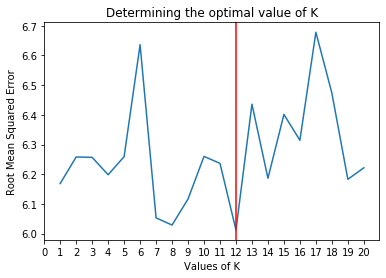

In [350]:
# graphically identifying optimal number of k
import matplotlib.pyplot as plt
plt.plot(k_errors["K"], k_errors["RMSE"])
plt.xlabel("Values of K")
plt.ylabel("Root Mean Squared Error")
plt.title("Determining the optimal value of K")
plt.xticks(np.arange(0, 21, 1))
plt.axvline(x = 12, color = 'red', label = 'axvline - full height')

In [351]:
# lowest number from graph and table i.e. optimal number of k is 12
# imputing rest of missing values with KNN
imputer = KNNImputer(n_neighbors=12)
imputed = imputer.fit_transform(mountain_cover_3_object)
mountain_cover_3_imputed = pd.DataFrame(imputed, columns=mountain_cover_3_object.columns)

In [352]:
# checking to see if there are any missing values now
print("count of NULL values after imputation\n")
mountain_cover_3_imputed.isnull().sum() # no missing values now!

count of NULL values after imputation



GeoAreaCode          0
GeoAreaName          0
Year                 0
MountainElevation    0
Value                0
FootNote             0
ObservationStatus    0
Nature               0
dtype: int64

In [353]:
# looking at the imputed data
mountain_cover_3_imputed 

,GeoAreaCode,GeoAreaName,Year,MountainElevation,Value,FootNote,ObservationStatus,Nature
0,1.0,170.0,2000.0,0.0,70.68710,1.0,1.0,1.0
1,1.0,170.0,2000.0,1.0,70.14530,1.0,1.0,1.0
2,1.0,170.0,2000.0,2.0,40.17291,1.0,1.0,1.0
3,1.0,170.0,2000.0,3.0,74.87943,1.0,1.0,1.0
4,1.0,170.0,2000.0,4.0,74.85856,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
3523,894.0,172.0,2015.0,6.0,99.26600,1.0,0.0,1.0
3524,894.0,172.0,2018.0,3.0,99.94235,1.0,0.0,1.0
3525,894.0,172.0,2018.0,4.0,99.81112,1.0,0.0,1.0
3526,894.0,172.0,2018.0,5.0,98.58857,1.0,0.0,1.0


In [359]:
# returning all other columnes (i.e. not Value) to original status
mountain_cover_3_imputed.loc[:,'GeoAreaCode'] = mountain_cover_3["GeoAreaCode"].values
mountain_cover_3_imputed.loc[:,'GeoAreaName'] = mountain_cover_3["GeoAreaName"].values
mountain_cover_3_imputed.loc[:,'Year'] = mountain_cover_3["Year"].values
mountain_cover_3_imputed.loc[:,'MountainElevation'] = mountain_cover_3["MountainElevation"].values
mountain_cover_3_imputed.loc[:,'FootNote'] = mountain_cover_3["FootNote"].values
mountain_cover_3_imputed.loc[:,'ObservationStatus'] = mountain_cover_3["ObservationStatus"].values
mountain_cover_3_imputed.loc[:,'Nature'] = mountain_cover_3["Nature"].values

In [360]:
# changing Footnote and Nature of imputed values
mountain_cover_3_imputed

,GeoAreaCode,GeoAreaName,Year,MountainElevation,Value,FootNote,ObservationStatus,Nature
0,1,World,2000,1,70.68710,FAO estimate.,E,G
1,1,World,2000,2,70.14530,FAO estimate.,E,G
2,1,World,2000,3,40.17291,FAO estimate.,E,G
3,1,World,2000,4,74.87943,FAO estimate.,E,G
4,1,World,2000,5,74.85856,FAO estimate.,E,G
...,...,...,...,...,...,...,...,...
3523,894,Zambia,2015,ALL,99.26600,FAO estimate.,A,G
3524,894,Zambia,2018,4,99.94235,FAO estimate.,A,G
3525,894,Zambia,2018,5,99.81112,FAO estimate.,A,G
3526,894,Zambia,2018,6,98.58857,FAO estimate.,A,G


In [372]:
# need to change FootNote, ObservationStatus, Nature to show that missing values have been imputed
# so looking into relevant column elements 
print("Unique elements under Nature:", mountain_cover_3_imputed["Nature"].unique())
print("Unique elements under ObservationStatus:", mountain_cover_3_imputed["ObservationStatus"].unique())
print("Unique elements under FootNote:", mountain_cover_3_imputed["FootNote"].unique())

Unique elements under Nature: ['G' nan 'C' 'M']
Unique elements under ObservationStatus: ['E' 'A' 'O' 'V']
Unique elements under FootNote: ['FAO estimate.' 'NA = A figure was not provided for technical reasons.'
 'Country estimate.' 'Metropolitan France.'
 'data are based on the estimation by FAO and not associated with Japanese official statistics.'
 'Modeled.']


In [382]:
# need to see footnotes that need to be changed
# refer back to SDG_15_4_2_desc for relevant elements that need changing 

## Observation: O, V
## Nature: NaN
## FootNote: NA = A figure was not provided for technical reasons.

# replacing with I for imputed under Nature column; Imputed under FootNote column ; I for imputed under ObservationStatus

In [383]:
# replacing elements
mountain_cover_3_imputed["ObservationStatus"] = mountain_cover_3_imputed['ObservationStatus'].replace(["O", "V"], ["I", "I"])
mountain_cover_3_imputed["Nature"] = mountain_cover_3_imputed['Nature'].replace("NaN", "I")
mountain_cover_3_imputed["FootNote"] = mountain_cover_3_imputed['FootNote'].replace("NA = A figure was not provided for technical reasons.", "Imputed")

In [401]:
# doing the same for SDG_15_4_2_desc
# old description
print("Former SDG 15.4.2 descriptors:")
SDG_15_4_2_desc

Former SDG 15.4.2 descriptors:


,Dimension,Code,Description
0,Mountain Elevation,1,Elevation > 4500 meters
1,Mountain Elevation,2,Elevation 3500–4500 meters
2,Mountain Elevation,3,Elevation 2500–3500 meters
3,Mountain Elevation,4,Elevation 1500–2500 meters and slope > 2
4,Mountain Elevation,5,Elevation 1000–1500 meters and slope > 5 or local elevation range (LER 7 kilometer radius) > 300 meters
5,Mountain Elevation,6,Elevation 300–1000 meters and local elevation range (7 kilometer radius) > 300 meters
6,Mountain Elevation,ALL,All elevations
7,Nature,C,Country data
8,Nature,G,Global monitoring data
9,Nature,M,Modeled data


In [402]:
# replacing Nature and ObservationStatus
SDG_15_4_2_desc.loc[10,'Code':'Description']="I","Imputed"
SDG_15_4_2_desc.loc[13,'Code':'Description']="I","Imputed"

# removing rows 14 and 15 since they are O and V
SDG_15_4_2_desc = SDG_15_4_2_desc.drop([14, 15])
print("New SDG 15.4.2 descriptors:")
SDG_15_4_2_desc

New SDG 15.4.2 descriptors:


,Dimension,Code,Description
0,Mountain Elevation,1,Elevation > 4500 meters
1,Mountain Elevation,2,Elevation 3500–4500 meters
2,Mountain Elevation,3,Elevation 2500–3500 meters
3,Mountain Elevation,4,Elevation 1500–2500 meters and slope > 2
4,Mountain Elevation,5,Elevation 1000–1500 meters and slope > 5 or local elevation range (LER 7 kilometer radius) > 300 meters
5,Mountain Elevation,6,Elevation 300–1000 meters and local elevation range (7 kilometer radius) > 300 meters
6,Mountain Elevation,ALL,All elevations
7,Nature,C,Country data
8,Nature,G,Global monitoring data
9,Nature,M,Modeled data


In [403]:
# save to excel file
mountain_cover_3_only_na.to_excel("SDG_15.4.2_mountain_cover_only_missing.xlsx")
SDG_15_4_2_desc.to_excel("SDG_15.4.2_mountain_cover_descriptions.xlsx")
mountain_cover_3_imputed.to_excel("SDG_15.4.2_mountain_cover.xlsx")